### WELCOME TO MY WORKPIECE FOR THIS PROJECT
I WILL DIVIDE THIS INTO SECTIONS
- DATA CLEANING AND EXPLORATION
- DATA WRANGLING 
- DATA VISUALIZATION

## DATA CLEANING AND EXPLORATION

In [208]:
#IMPORT RELEVANT LIBRARIES

#Data Wrangling
import pandas as pd
import numpy  as np

#Visualization Libraries
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

#Data Summary
from skimpy import skim

# Statistical analysis
from scipy.stats import ttest_ind


In [81]:
#IMPORTING TRANSACTION DATA 
transction_data = pd.read_csv('QVI_transaction_data_1.csv', parse_dates=True)
transction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


The output indicates the all rows are are filled with non_null values
this is quite a good thing that we are not having null values 
but we have to explore deeper
By obseravtion, we can see that the 'DATE' column is the wrong format

### CLEANING DATES

In [82]:
print(transction_data['DATE'].head(3))
#converting time column to date format
transction_data['DATE'] = pd.to_datetime(transction_data['DATE'], 
                                           unit = 'D',
                                           origin ='1899-12-30' )
print(transction_data['DATE'].head(3))

''' AFTER COVERTING TO DATE FORMAT, I USUALLY EXTRACT THE DAY, MONTH AND YEAR TO SEPRATE COLUMNS'''
#want to combine this to show do all at once 
transction_data['Date_day']    =  transction_data['DATE'].dt.day_name()
transction_data['Date_month']  =  transction_data['DATE'].dt.month_name()
transction_data['Date_year']   =  transction_data['DATE'].dt.year

0    43390
1    43599
2    43605
Name: DATE, dtype: int64
0   2018-10-17
1   2019-05-14
2   2019-05-20
Name: DATE, dtype: datetime64[ns]


### A bit more exploration

In [84]:
#how many stores in the region
transction_data['STORE_NBR'].nunique()

272

In [85]:
#how many unique customers were in the region 
transction_data['LYLTY_CARD_NBR'].nunique()

72637

In [86]:
#how many unique products were in the region
transction_data['PROD_NAME'].nunique()

114

### PROD_QTY exploration

In [88]:
#maximum and minimum quantities purchased
transction_data['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [89]:
#count the unique values 
print(transction_data['PROD_QTY'].value_counts())
'''
The value of 200 qty seems to be an outlier in the prices by satistical analysis, 
i want to verify this by find the quantities taht were greater than 2 which is the is the 75th pecentile of the data set
i also discovered that this customer had 2 purchases of this sort in the last 2 year, one per year which is indicative that
customer is not a regular retailer
'''

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64


'\nThe value of 200 qty seems to be an outlier in the prices by satistical analysis, \ni want to verify this by find the quantities taht were greater than 2 which is the is the 75th pecentile of the data set\ni also discovered that this customer had 2 purchases of this sort in the last 2 year, one per year which is indicative that\ncustomer is not a regular retailer\n'

In [90]:
transction_data[transction_data['PROD_QTY'] == 200]
#Pick up the customer and find if hat customerhad made any other purchases


transction_data = transction_data[transction_data['PROD_QTY'] != 200]
# since the occurances of having 200 comes rarely, it would be useful to take it as an outlier

### CREATE A UNIT PRICE COLUMN

(array([10329., 15020., 23625., 48319., 60132., 34950., 25291., 28341.,
        15773.,  3054.]),
 array([1.32 , 1.838, 2.356, 2.874, 3.392, 3.91 , 4.428, 4.946, 5.464,
        5.982, 6.5  ]),
 <BarContainer object of 10 artists>)

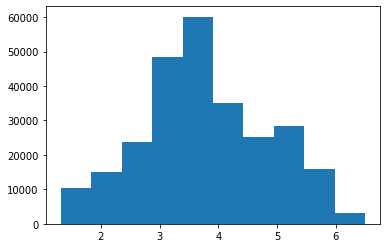

In [92]:
#i want to describe products by unit prices
transction_data['Unit_price'] = transction_data['TOT_SALES']/transction_data['PROD_QTY']
plt.hist(transction_data['Unit_price'])

'\nProducts with unit prices of $4.4-4.6, $3.70 -3.80 , $3.00, $5.40\nI can conclude the chips within the ranges of $3 to $5 dollars have the most purchases \n'

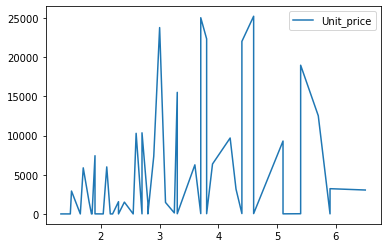

In [93]:
#transction_data['Unit_price'].groupby(['Unit_price'])['Unit_price'].count()
price_distr = pd.DataFrame(transction_data['Unit_price'].value_counts().sort_index())
price_distr.plot(kind= 'line')

"""
Products with unit prices of $4.4-4.6, $3.70 -3.80 , $3.00, $5.40
I can conclude the chips within the ranges of $3 to $5 dollars have the most purchases 
"""

In [94]:
#extracting the 'PROD_NAME' 
chips = transction_data['PROD_NAME'].astype('string')
#extracting the weight of each product and concatanating it to the original dataframe
transction_data['PROD_SIZE'] = chips.str[-4:-1]
transction_data['PROD_SIZE'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
Sal     3257
250     3169
 90     3008
190     2995
160     2970
220     1564
 70     1507
180     1468
125     1454
Name: PROD_SIZE, dtype: Int64

In [95]:
transction_data[transction_data['PROD_SIZE'] == 'Sal'].PROD_NAME.value_counts()

Kettle 135g Swt Pot Sea Salt    3257
Name: PROD_NAME, dtype: int64

In [96]:
#simplified the operation by using jsut on line of data}) 
transction_data['PROD_SIZE'][transction_data['PROD_SIZE'] == 'Sal'] = chips.str[7:10]

Text(0.5, 0, 'WEIGHTS IN GRAMS')

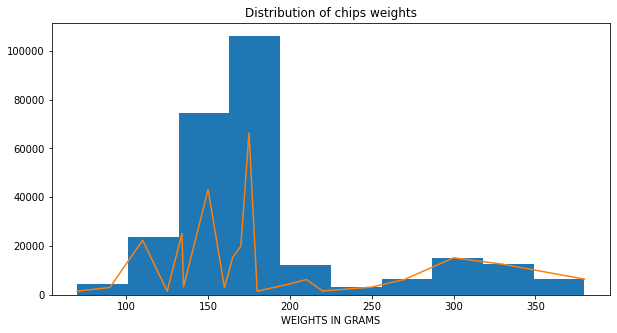

In [97]:

transction_data['PROD_SIZE'] = transction_data['PROD_SIZE'].astype(int)

plt.figure(figsize = (10, 5))
plt.hist(transction_data['PROD_SIZE']) 
plt.plot(transction_data['PROD_SIZE'].value_counts().sort_index())
plt.title("Distribution of chips weights")
plt.xlabel("WEIGHTS IN GRAMS")

Most purchased chip ranges from 100g to 200g
175g,150g,134g, 110g and 170g are the most purchased chips weights categories 


using a string will non enable me sort by weight ranges, so since all weights are in grams(g),
we will replace the 'PROD_SIZE' with intergers only' 
'''
transction_data['PROD_SIZE'] = transction_data['PROD_SIZE'].str[0:-1]
This also can be done by striping 'g' and converting it to intergers 
transction_data.PROD_SIZE = transction_data.PROD_SIZE.astype(int)
'''

In [98]:
#find if there are duplicate transaction IDS
transction_data[transction_data[['TXN_ID','PROD_NBR']].duplicated(keep = False)]
#there is a dublicate TXN_Id & PROD_NBR so ane of its occurance will be dropped
transction_data = transction_data.drop_duplicates()

In [99]:
chips.str[:-4].value_counts().to_frame().to_csv('check_in_excel.csv' )
#The above file is exported to excel and worked on to make a brand and flavour file
brand_and_flavours = pd.read_csv('Brands_andd_products.csv')
brand_and_flavours

,key,Brand Names,Flavour
0,Kettle Mozzarella Basil & Pesto,Kettle,Mozzarella Basil & Pesto
1,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,Tortilla ChpsHny & Jlpno Chili
2,Cobs Popd Swt/Chlli &Sr/Cream Chips,Cobs Popd,Swt/Chlli &Sr/Cream Chips
3,Tyrrells Crisps Ched & Chives,Tyrrells Crisps,Ched & Chives
4,Cobs Popd Sea Salt Chips,Cobs Popd,Sea Salt Chips
...,...,...,...
109,RRD Pc Sea Salt,Red Rock Deli,Pc Sea Salt
110,Woolworths Medium Salsa,Woolworths,Medium Salsa
111,NCC Sour Cream & Garden Chives,NCC,Sour Cream & Garden Chives
112,French Fries Potato Chips,French Fries,Potato Chips


In [100]:
#CREATE KEY COLUMN SIMILAR TO THAT IN 'brand_and_flavours'
transction_data['key'] = transction_data.PROD_NAME.str[:-4]

transction_data = pd.merge(transction_data,brand_and_flavours, on="key")
transction_data = transction_data.drop(columns = ['key'])
#now the  transaction data is ready for analysis
transction_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_day,Date_month,Date_year,Unit_price,PROD_SIZE,Brand Names,Flavour
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,October,2018,3.0,175,Natural Chip Co,Compny SeaSalt
1,2018-12-05,5,5050,4667,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,December,2018,3.0,175,Natural Chip Co,Compny SeaSalt
2,2018-08-04,16,16364,14497,5,Natural Chip Compny SeaSalt175g,1,3.0,Saturday,August,2018,3.0,175,Natural Chip Co,Compny SeaSalt


### check for product caterories and drop 'salsa'

In [101]:
salsa_index     = transction_data[transction_data['PROD_NAME'].str.contains("salsa ", case=False)].index
transction_data = transction_data.drop(index = salsa_index)

## QVI purchase behaviour Data Exploration and Cleaning

In [102]:
##QVI purchase behaviour'
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour_1.csv')
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


## MERGED transction_data AND purchase_behaviour DATASETS

In [103]:
merged_dataset = pd.merge(transction_data,purchase_behaviour, on="LYLTY_CARD_NBR")
merged_dataset.to_csv('Merged_dataset.csv')

# Data vizualizations and exploration
I Prefer using bi tool to do my data exploration after cleaning with a scripting language.

## Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [105]:
#Data vizualizationa and exploration
'''
i Prefer using bi tool to do my data exploration after cleaning with a scripting language.
'''

'\ni Prefer using bi tool to do my data exploration after cleaning with a scripting language.\n'

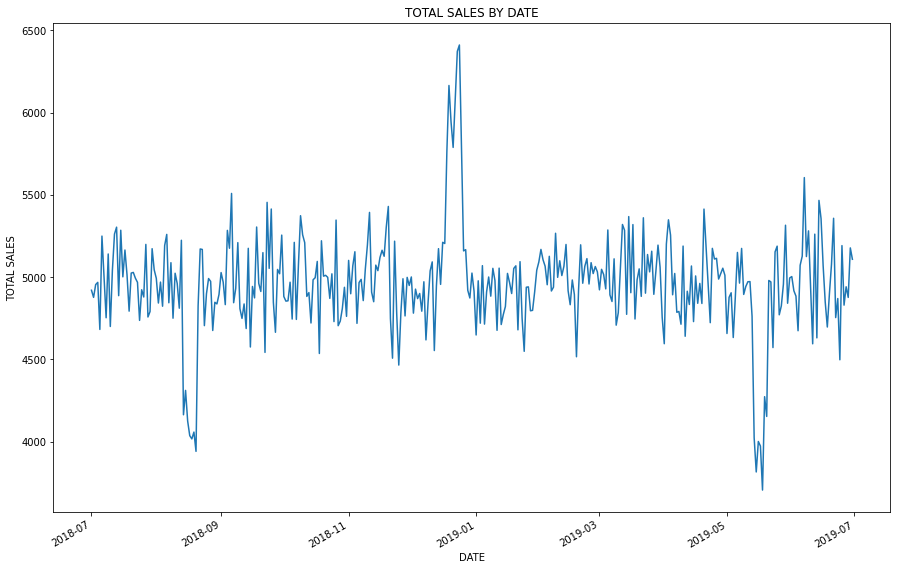

In [106]:
fig = plt.figure(figsize =(15,10))
merged_dataset[['DATE','TOT_SALES']].groupby('DATE')['TOT_SALES'].sum().plot()
plt.title("TOTAL SALES BY DATE")
plt.xlabel("DATE")
plt.ylabel("TOTAL SALES")
fig.savefig('line_plot.png')

<Figure size 1080x720 with 0 Axes>

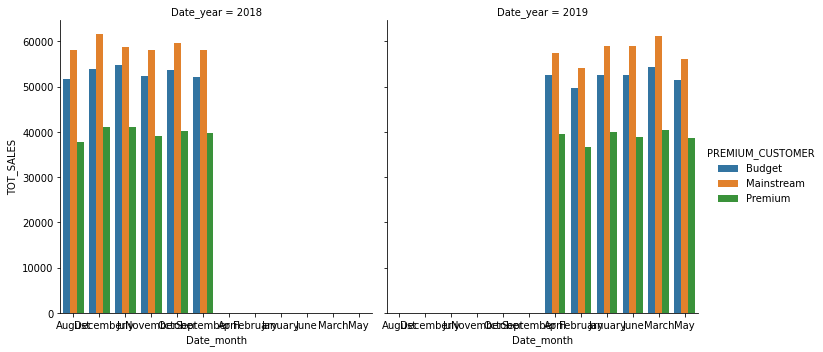

In [107]:
merged1 = pd.DataFrame(merged_dataset[['Date_year','Date_month','TOT_SALES','PREMIUM_CUSTOMER']].groupby(['Date_year','Date_month','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index())
merged1
fig = plt.figure(figsize =(15,10))
sns.catplot(x='Date_month', y='TOT_SALES', hue = 'PREMIUM_CUSTOMER',
          col='Date_year', data = merged1, kind='bar')

<AxesSubplot:>

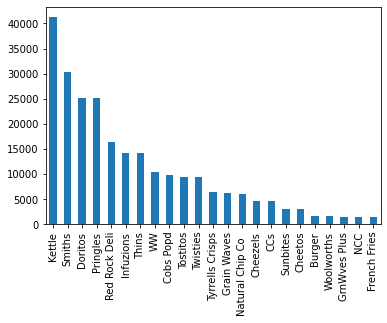

In [109]:
#DISTRIBUTION OF OF BRANDS ACROSS ALL GROUPS

merged_dataset['Brand Names'].value_counts().plot(kind = 'bar')

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

<AxesSubplot:xlabel='LIFESTAGE'>

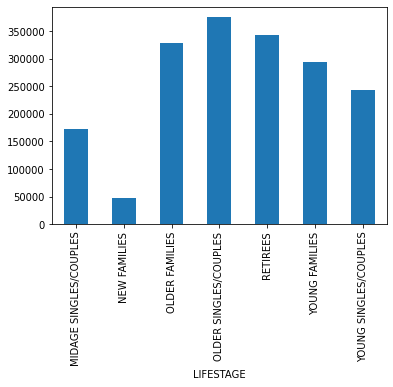

In [110]:
merged_dataset[['LIFESTAGE','TOT_SALES']].groupby('LIFESTAGE')['TOT_SALES'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='PREMIUM_CUSTOMER'>

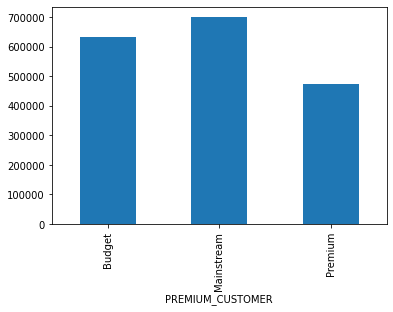

In [111]:
merged_dataset[['PREMIUM_CUSTOMER','TOT_SALES']].groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind = 'bar')

 ## Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [145]:

lifestag_and_premium  = pd.DataFrame(merged_dataset[['PREMIUM_CUSTOMER','LIFESTAGE','TOT_SALES']]
                                     .groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum())


lifestag_and_premium.sort_values('TOT_SALES', ascending=False).head()



,,TOT_SALES
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,156863.75
YOUNG SINGLES/COUPLES,Mainstream,147582.20
RETIREES,Mainstream,145168.95
YOUNG FAMILIES,Budget,129717.95
OLDER SINGLES/COUPLES,Budget,127833.60


<Figure size 1080x720 with 0 Axes>

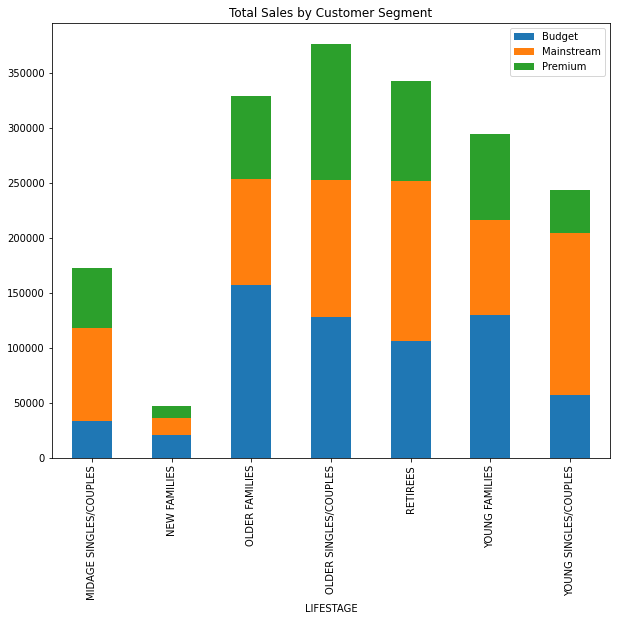

In [146]:

lifestag_and_premium  = lifestag_and_premium.unstack()

#Viz
fig = plt.figure(figsize =(15,10))
lifestag_and_premium.plot(kind='bar', stacked=True,figsize = (10, 8), title = 'Total Sales by Customer Segment')
plt.legend(['Budget', 'Mainstream', 'Premium'])

Top 3 sales comes from in order
- OLDER FAMILIES	Budget	
- YOUNG SINGLES/COUPLES	Mainstream	
- RETIREES	Mainstream	

  ### Total NUMBER OF CUSTOMERS by LIFESTAGE and PREMIUM_CUSTOMER

In [149]:

no_cust = pd.DataFrame(merged_dataset[['PREMIUM_CUSTOMER','LIFESTAGE','LYLTY_CARD_NBR']]
                                     .groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())

no_cust.sort_values('LYLTY_CARD_NBR', ascending=False).head()


LYLTY_CARD_NBR
LIFESTAGE             PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES Mainstream                  7917
RETIREES              Mainstream                  6358
OLDER SINGLES/COUPLES Mainstream                  4858
                      Budget                      4849
                      Premium                     4682

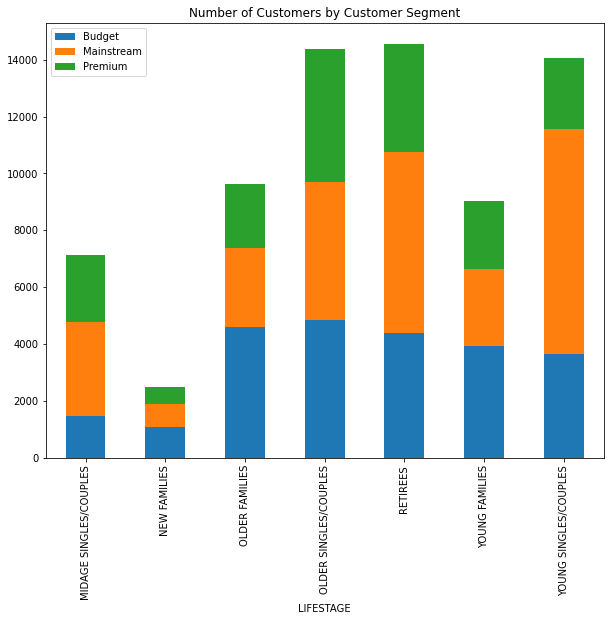

In [150]:
no_cust = no_cust.unstack()
no_cust.plot(stacked = True, kind ='bar', figsize = (10,8), title = 'Number of Customers by Customer Segment' )
plt.legend(['Budget', 'Mainstream', 'Premium'])


There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these segments however this is not the major driver for the budget older families segment in comparism to the total salses.
This might be due to the fact tha the budget older families buys chips with more unit price per chip than mainstream young singles and retirees 

### NUMBER OF CHIPS PER CUSTOMER by PREMIUM_CUSTOMER and LIFESTAGE

In [185]:
no_chips = pd.DataFrame(merged_dataset[['PREMIUM_CUSTOMER','LIFESTAGE','LYLTY_CARD_NBR','PROD_QTY']]
                        .groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY': 'sum' ,'LYLTY_CARD_NBR':'nunique'}))

no_chips['CHIPSperCUST'] =  no_chips['PROD_QTY']/no_chips['LYLTY_CARD_NBR']
no_chips = no_chips.drop(columns= ['LYLTY_CARD_NBR','PROD_QTY'])
no_chips.sort_values('CHIPSperCUST', ascending=False).head()

CHIPSperCUST
LIFESTAGE      PREMIUM_CUSTOMER              
OLDER FAMILIES Mainstream            9.255380
               Budget                9.076773
               Premium               9.071717
YOUNG FAMILIES Budget                8.722995
               Premium               8.716013

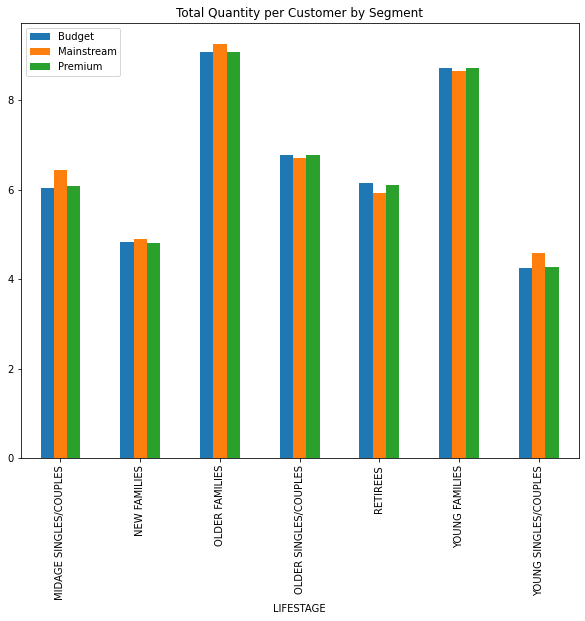

In [186]:
no_chips = no_chips.unstack()
no_chips.plot(stacked = False , kind ='bar', figsize = (10,8), title = 'Total Quantity per Customer by Segment' )
plt.legend(['Budget', 'Mainstream', 'Premium'])

OLDER and YOUNG FAMILIES Purchase higher Number of chips per customer 

### Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE

In [191]:
unit_cost = pd.DataFrame(merged_dataset[['PREMIUM_CUSTOMER','LIFESTAGE','Unit_price']]
                        .groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['Unit_price'].mean())



unit_cost.sort_values('Unit_price', ascending=False).head()

Unit_price
LIFESTAGE              PREMIUM_CUSTOMER            
YOUNG SINGLES/COUPLES  Mainstream          4.065642
MIDAGE SINGLES/COUPLES Mainstream          3.994241
RETIREES               Budget              3.924404
                       Premium             3.920942
NEW FAMILIES           Budget              3.917688

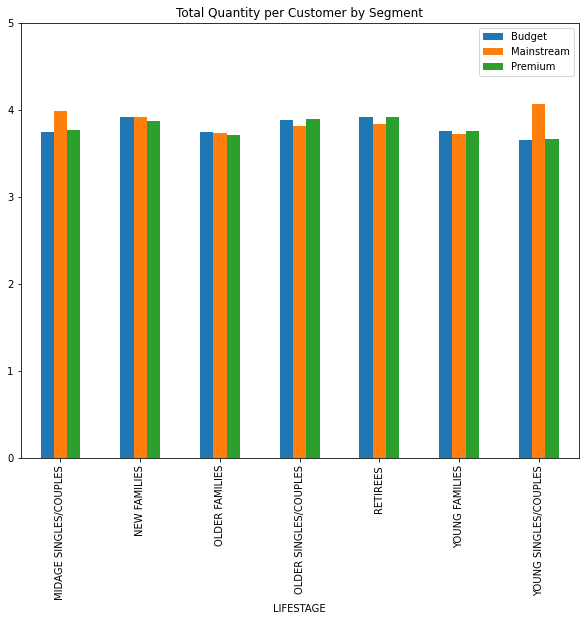

In [192]:
unit_cost = unit_cost.unstack()
unit_cost.plot(stacked = False , kind ='bar', figsize = (10,8), title = 'Total Quantity per Customer by Segment', ylim = (0,5) )
plt.legend(['Budget', 'Mainstream', 'Premium'])

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

#### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
- Group 1 = Mainstream         MIDAGE and Young SINGLES AND COUPLES
- Group 2 = Premium and budget MIDAGE and Young Singles and couples

In [197]:
#Focus group will be the midage and young singles and couples
focus_group = merged_dataset[merged_dataset['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]      #Extract focus groups form the dataset
focus_group.head(2)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_day,Date_month,Date_year,Unit_price,PROD_SIZE,Brand Names,Flavour,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,October,2018,3.0,175,Natural Chip Co,Compny SeaSalt,YOUNG SINGLES/COUPLES,Premium
1,2018-12-05,5,5050,4667,5,Natural Chip Compny SeaSalt175g,2,6.0,Wednesday,December,2018,3.0,175,Natural Chip Co,Compny SeaSalt,MIDAGE SINGLES/COUPLES,Budget


Text(0.5, 0, 'Price per Unit')

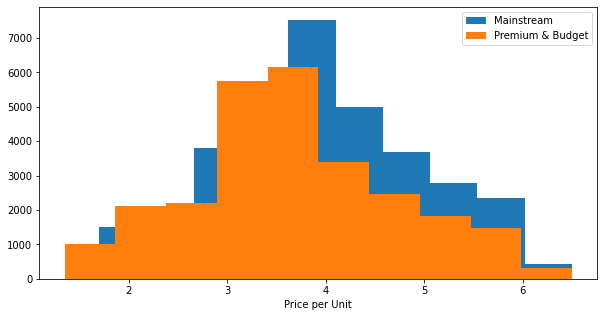

In [205]:
group1 = focus_group[focus_group['PREMIUM_CUSTOMER'] == 'Mainstream']          #Only Mainstream customers 
group2 = focus_group[focus_group['PREMIUM_CUSTOMER'] != 'Mainstream']

# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(group1['Unit_price'], label = 'Mainstream')
plt.hist(group2['Unit_price'], label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [206]:
group1_mean =  group1['Unit_price'].mean()
group2_mean =  group2['Unit_price'].mean()
group1_mean > group2_mean

True

This is quite clear that the mainstream is quite higher. Lets check if the difference is statistically significant
NB: the mean unit price of the mainstream is greater than that of Premium and Budget


In [210]:
# Perform t-test 

ttest_ind(group1['Unit_price'], group2['Unit_price'])

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

pvalue is less than 0.001 so the teh results are highly significant  

## Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
#### Let's look at Mainstream - young singles/couples as a target group 

In [221]:
targetGRP    = merged_dataset[(merged_dataset['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')  & (merged_dataset['PREMIUM_CUSTOMER'] == 'Mainstream')]
nonTargetGRP = merged_dataset[(merged_dataset['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES')  & (merged_dataset['PREMIUM_CUSTOMER'] != 'Mainstream')]
targetGRP 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_day,Date_month,Date_year,Unit_price,PROD_SIZE,Brand Names,Flavour,LIFESTAGE,PREMIUM_CUSTOMER
7608,2019-05-19,223,223186,224042,5,Natural Chip Compny SeaSalt175g,1,3.0,Sunday,May,2019,3.0,175,Natural Chip Co,Compny SeaSalt,YOUNG SINGLES/COUPLES,Mainstream
7609,2019-06-09,223,223186,224043,71,Twisties Cheese Burger 250g,2,8.6,Sunday,June,2019,4.3,250,Twisties,Cheese Burger,YOUNG SINGLES/COUPLES,Mainstream
7610,2018-12-14,223,223186,224040,96,WW Original Stacked Chips 160g,2,3.8,Friday,December,2018,1.9,160,WW,Original Stacked Chips,YOUNG SINGLES/COUPLES,Mainstream
7611,2018-10-26,223,223186,224039,90,Tostitos Smoked Chipotle 175g,2,8.8,Friday,October,2018,4.4,175,Tostitos,Smoked Chipotle,YOUNG SINGLES/COUPLES,Mainstream
7612,2019-05-17,223,223186,224041,11,RRD Pc Sea Salt 165g,2,6.0,Friday,May,2019,3.0,165,Red Rock Deli,Pc Sea Salt,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246727,2019-01-20,124,124011,127744,43,Smith Crinkle Cut Bolognese 150g,1,2.6,Sunday,January,2019,2.6,150,Smiths,Crinkle Cut Bolognese,YOUNG SINGLES/COUPLES,Mainstream
246728,2019-03-16,146,146408,145731,43,Smith Crinkle Cut Bolognese 150g,1,2.6,Saturday,March,2019,2.6,150,Smiths,Crinkle Cut Bolognese,YOUNG SINGLES/COUPLES,Mainstream
246729,2018-08-28,169,169471,171627,43,Smith Crinkle Cut Bolognese 150g,2,5.2,Tuesday,August,2018,2.6,150,Smiths,Crinkle Cut Bolognese,YOUNG SINGLES/COUPLES,Mainstream
246730,2018-12-21,188,188150,189478,43,Smith Crinkle Cut Bolognese 150g,2,5.2,Friday,December,2018,2.6,150,Smiths,Crinkle Cut Bolognese,YOUNG SINGLES/COUPLES,Mainstream


### MAINSTREAM YOUNG SINGLES/COUPLES AFFINITY TO BRAND 

In [238]:
#For target brand
targetBrandTotQty  = targetGRP['PROD_QTY'].sum()
targetBrand        = pd.DataFrame(targetGRP.groupby('Brand Names')['PROD_QTY'].sum()/targetBrandTotQty).rename(columns={'PROD_QTY': 'Target Brand Affinity'})
targetBrand

#For target brand
NOTtargetBrandTotQty  = nonTargetGRP['PROD_QTY'].sum()
NOTtargetBrand        = pd.DataFrame(nonTargetGRP.groupby('Brand Names')['PROD_QTY'].sum()/NOTtargetBrandTotQty).rename(columns={'PROD_QTY': 'NON Target Brand Affinity'})

# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand,NOTtargetBrand , left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,NON Target Brand Affinity
Brand Names,,
Burger,0.002926,0.006538
CCs,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs Popd,0.044638,0.038449


In [241]:
brand_proportions['Affinity to Target Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['NON Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Target Brand', ascending = False).head()

,Target Brand Affinity,NON Target Brand Affinity,Affinity to Target Brand
Brand Names,,,
Tyrrells Crisps,0.031553,0.025715,1.227016
Twisties,0.046184,0.037933,1.217496
Doritos,0.122761,0.101172,1.213388
Kettle,0.197985,0.166562,1.188658
Tostitos,0.045411,0.038351,1.184091


Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.



### MAINSTREAM YOUNG SINGLES/COUPLES AFFINITY TO PACKSIZE

In [243]:
#For target PACKSIZE
targetPACKSIZETotQty  = targetGRP['PROD_QTY'].sum()
targetPACKSIZE        = pd.DataFrame(targetGRP.groupby('PROD_SIZE')['PROD_QTY'].sum()/targetPACKSIZETotQty).rename(columns={'PROD_QTY': 'Target PACKSIZE Affinity'})
targetPACKSIZE

#For target PACKSIZE
NOTtargetPACKSIZETotQty  = nonTargetGRP['PROD_QTY'].sum()
NOTtargetPACKSIZE        = pd.DataFrame(nonTargetGRP.groupby('PROD_SIZE')['PROD_QTY'].sum()/NOTtargetPACKSIZETotQty).rename(columns={'PROD_QTY': 'NON Target PACKSIZE Affinity'})

# Merge the two dataframes together

PACKSIZE_proportions = pd.merge(targetPACKSIZE,NOTtargetPACKSIZE , left_index = True, right_index = True)
PACKSIZE_proportions.head()

,Target PACKSIZE Affinity,NON Target PACKSIZE Affinity
PROD_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089576
125,0.003009,0.005976
134,0.119420,0.101111


In [244]:
PACKSIZE_proportions['Affinity to Target SIZE'] = PACKSIZE_proportions['Target PACKSIZE Affinity'] / PACKSIZE_proportions['NON Target PACKSIZE Affinity']
PACKSIZE_proportions.sort_values(by = 'Affinity to Target SIZE', ascending = False).head()

,Target PACKSIZE Affinity,NON Target PACKSIZE Affinity,Affinity to Target SIZE
PROD_SIZE,,,
270,0.031829,0.025070,1.269599
380,0.032160,0.025711,1.250818
330,0.061284,0.050975,1.202234
110,0.106280,0.089576,1.186483
134,0.119420,0.101111,1.181081


It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.

Insights

GENERAL
- Chips weighing from 110g to 175 are the most purchased chips weights categories 
- Most purchased chips where within the ranges of 3-5 dollars for a unit price for a unit price

GENERAL SEGMENTS
- Sales are coming mainly from Budget-OLDER FAMILY, Mainstream-YOUNG SINGLES/COUPLES and Mainstream-RETIREES
- OLDER and YOUNG FAMILY in general buy more chips per customer
- Mainstream MIDAGE and YOUNG SINGLES/COUPLES are more willing to pay more per packet of chips compared to their budget and premium counterparts.

SPECIFIC SEGMENTS(MAINSTREAM, YOUNG SINGLES/COUPLES)
- They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population
